In [1]:
#Shivam's Test Notebook for Partisan Project
# RELOAD THIS WITH %load datasci.py EVERYTIME
# %load datasci.py
#Written by Shivam Parikh
#Wednesday, March 8th, 2017

%matplotlib inline

In [2]:
import numpy as np
from datascience import Table
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.rcParams["figure.figsize"] = (16,14)
plt.rcParams["font.family"] = "Sans Serif"

In [3]:
def houseDictPerYear(year):
    total = 0
    result = {'partisan': 0, 'bipartisan': 0, 'nonpartisan': 0, 'yes': 0, 'no': 0}
    file_name = "../Bill_Documents/House/" + str(year) + "_house_bills.csv"
    with open(file_name, 'r', errors = 'ignore') as f:
        reader = csv.reader(f)
        dataset = list(reader)
        
    for vote in dataset[2:]:
        try:
            if(vote[3]=="QUORUM"):
                continue
            if(housePassOrFail(vote[8]) == 1):
                result['yes'] += 1
            else:
                result['no'] += 1
            total += 1
            if(int(vote[21])==0 or int(vote[22])==0):
                result['bipartisan'] += 1
                continue
            repYes = int(vote[9])/int(vote[21])
            demYes = int(vote[13])/int(vote[21])
            repNo = int(vote[10])/int(vote[22])
            demNo = int(vote[14])/int(vote[22])
            biPart = [repYes,demYes,repNo,demNo]
            totalYes = int(vote[21])/(int(vote[21])+int(vote[22]))
            totalNo = int(vote[22])/(int(vote[21])+int(vote[22]))
            if(testPercentage([totalYes, totalNo], 0.95)):
                result['bipartisan'] += 1
            elif(testPercentage(biPart, 0.95)):
                result['partisan'] += 1
            else:
                result['nonpartisan'] += 1
        except IndexError:
            continue
    for key in result.keys():
        result[key] = 100*result[key]/total
    result['year'] = year
    result['total'] = total
    return result

def senateDictPerYear(year):
    total = 0
    result = {'partisan': 0, 'bipartisan': 0, 'nonpartisan': 0, 'yes': 0, 'no': 0}
    file_name = "../Bill_Documents/Senate/" + str(year) + "_senate_bills.csv"
    with open(file_name, 'r', errors = 'ignore') as f:
        reader = csv.reader(f)
        dataset = list(reader)

    for vote in dataset[1:]:
        try:
            if(senatePassOrFail(vote[8]) == 1):
                result['yes'] += 1
            else:
                result['no'] += 1
            total += 1
            if(int(vote[22]) == 0 or int(vote[23])==0):
                result['bipartisan'] += 1
                continue
            repYes = int(vote[10])/int(vote[22])
            demYes = int(vote[14])/int(vote[22])
            repNo = int(vote[11])/int(vote[23])
            demNo = int(vote[15])/int(vote[23])
            totalYes = int(vote[22])/(int(vote[22])+int(vote[23]))
            totalNo = int(vote[23])/(int(vote[22])+int(vote[23]))
            biPart = [repYes,demYes,repNo,demNo]
            
#             repYes = int(vote[10])/(int(vote[10])+int(vote[11]))
#             repNo = int(vote[11])/(int(vote[10])+int(vote[11]))
#             demYes = int(vote[14])/(int(vote[14])+int(vote[15]))
#             demNo = int(vote[15])/(int(vote[14])+int(vote[15]))
#             totalYes = int(vote[22])/(int(vote[22])+int(vote[23]))
#             totalNo = int(vote[23])/(int(vote[22])+int(vote[23]))
#             biPart = [repYes,demYes,repNo,demNo]
            
            if(testPercentage([totalYes, totalNo], 0.90)):
                result['bipartisan'] += 1
            elif(testPercentage(biPart, 0.90)):
                result['partisan'] += 1
            else:
                result['nonpartisan'] += 1
        except IndexError:
            continue
    for key in result.keys():
        result[key] = 100*result[key]/total
    result['year'] = year
    result['total'] = total
    return result


def testPercentage(array, percentage):
    for each in array:
        if(each >= percentage):
            return True
    return False

def housePassOrFail(string):
    if(string=="Passed" or string=="Agreed to"):
        return 1
    elif(string == "Failed"):
        return 0
    else:
        return -1

def senatePassOrFail(string):
    if('Agreed' in string):
        return 1
    elif('Rejected' in string):
        return 0
    else:
        return -1

In [4]:
#Calculate all the values once
cong_dict = [houseDictPerYear(y) for y in range(1990, 2018)]
sen_dict = [senateDictPerYear(y) for y in range(1990, 2018)]

In [5]:
TITLE_SIZE = 24
AXIS_TITLE_SIZE = 24
AXIS_SIZE = 16
LEGEND_SIZE = 15
lw = 7
save = False
def datasci(x):
    house = Table().with_columns("Year", np.arange(1990, 2018),
                                    "House Partisan", np.array([x['partisan'] for x in cong_dict]),
                                    "House Non Partisan", np.array([x['nonpartisan'] for x in cong_dict]),
                                    "House Bipartisan", np.array([x['bipartisan'] for x in cong_dict]))
    senate = Table().with_columns("Year", np.arange(1990, 2018),
                                    "Senate Partisan", np.array([x['partisan'] for x in sen_dict]),
                                    "Senate Non Partisan", np.array([x['nonpartisan'] for x in sen_dict]),
                                    "Senate Bipartisan", np.array([x['bipartisan'] for x in sen_dict]))
    total = senate.join("Year", house)
    plt.axis([1989, 2021, 0, 100])
    plt.xticks(np.arange(1989, 2021, 2), fontsize=AXIS_SIZE)
    plt.yticks(np.arange(0,101,10), fontsize=AXIS_SIZE)
    drawParties(plt, "both")
    if(x=='Partisan'):
        plt.title("Percentage of Votes that were Partisan in Both Chambers", fontsize=TITLE_SIZE)
        plt.plot(total.column("Year"), total.column("House Partisan"), 'k', c='#6BD6C2', label="House Partisan", linewidth=lw)
        plt.plot(total.column("Year"), total.column("Senate Partisan"), 'k', c='#A379C9', label="Senate Partisan", linewidth=lw)
    elif(x=='Nonpartisan'):
        plt.title("Percentage of Votes that were Nonpartisan in Both Chambers", fontsize=20)
        plt.plot(total.column("Year"), total.column("House Non Partisan"), 'k', c='#6BD6C2', label="House Nonpartisan", linewidth=lw)
        plt.plot(total.column("Year"), total.column("Senate Non Partisan"), 'k', c='#A379C9', label="Senate Nonpartisan", linewidth=lw)
    else:
        plt.title("Percentage of Votes that were Bipartisan in Both Chambers", fontsize=20)
        plt.plot(total.column("Year"), total.column("House Bipartisan"), 'k', c='#6BD6C2', label="House Bipartisan", linewidth=lw)
        plt.plot(total.column("Year"), total.column("Senate Bipartisan"), 'k', c='#A379C9', label="Senate Bipartisan", linewidth=lw)
    plt.legend(loc=1, fontsize=LEGEND_SIZE)
    plt.ylabel("Percentage of Total Votes", fontsize=AXIS_TITLE_SIZE)
    plt.xlabel("Years (1990-2017)", fontsize=AXIS_TITLE_SIZE)
    if(save): plt.savefig("Join_Final_"+x+".png")
    plt.show()
    

def houseGenerateLine():
    house = {}
    plt.axis([1989, 2021, 0, 100])
    plt.xticks(np.arange(1989, 2021, 2), fontsize=AXIS_SIZE)
    plt.yticks(np.arange(0,101,10), fontsize=AXIS_SIZE)
    for year in range(1990, 2018):
        temp = houseDictPerYear(year)
        house[year] = (temp['partisan'], temp['bipartisan'], temp['nonpartisan'])
    plt.plot(sorted(house.keys()), [house[x][0] for x in sorted(house.keys())],
             'k', color='#44CCFF', label="Partisan", linewidth=lw)
    plt.plot(sorted(house.keys()), [house[x][1] for x in sorted(house.keys())],
             'k', color='#35FF69', label="Bipartisan", linewidth=lw)
    plt.plot(sorted(house.keys()), [house[x][2] for x in sorted(house.keys())],
             'k', color='#494947', label="Nonpartisan", linewidth=lw)
    drawParties(plt, "house")
    plt.legend(loc=1, fontsize=LEGEND_SIZE)
    plt.title("(Bi)Partisan Voting in the\nU.S. House of Representatives from 1990-2017", fontsize=TITLE_SIZE)
    plt.ylabel("Percentage of Total Votes in the House (0-100%)", fontsize=AXIS_TITLE_SIZE)
    plt.xlabel("Years (1990-2017)", fontsize=AXIS_TITLE_SIZE)
    if(save): plt.savefig("HOR_Final.png")
    plt.show()

def senateGenerateLine():
    dict = {}
    plt.axis([1989, 2020, 0, 100])
    plt.xticks(np.arange(1989, 2021, 2), fontsize=AXIS_SIZE)
    plt.yticks(np.arange(0,101,10), fontsize=AXIS_SIZE)
    for year in range(1990, 2018):
        temp = senateDictPerYear(year)
        dict[year] = (temp['partisan'], temp['bipartisan'], temp['nonpartisan'])
    plt.plot(sorted(dict.keys()), [dict[x][0] for x in sorted(dict.keys())],
            'k', color='#44CCFF', label="Partisan", linewidth=lw)
    plt.plot(sorted(dict.keys()), [dict[x][1] for x in sorted(dict.keys())],
            'k', color='#35FF69', label="Bipartisan", linewidth=lw)
    plt.plot(sorted(dict.keys()), [dict[x][2] for x in sorted(dict.keys())],
            'k', color='#494947', label="Nonpartisan", linewidth=lw)
    plt.legend(loc=1, fontsize=LEGEND_SIZE)
    drawParties(plt, "senate")
    plt.title("(Bi)Partisan Voting in the\nU.S. Senate from 1990-2017", fontsize=TITLE_SIZE)
    plt.ylabel("Percentage of Total Votes in the Senate (0-100%)", fontsize=AXIS_TITLE_SIZE)
    plt.xlabel("Years (1990-2017)", fontsize=AXIS_TITLE_SIZE)
    if(save): plt.savefig("Senate_Final.png")
    plt.show()

def drawParties(plot, party="president"):
    fs = 20
    with open("/Users/ShivamParikh/Development/partisan/Bill_Documents/majority.csv", 'r', errors = 'ignore') as f:
        reader = csv.reader(f)
        dataset = list(reader)
    dataset = dataset[1:]
    if(party == "president"):
        set = [3, 1, 2]
        plot.annotate("Party Majority in Senate", xy=(1990,70), xytext=(1989.4,2), fontsize=fs)
        plot.annotate("Party Majority in House", xy=(1990,20), xytext=(1989.4,7), fontsize=fs)
        plot.annotate("President's\nParty", xy=(1990,0),xytext=(1989.4,80), fontsize=fs)
    elif(party == "senate"):
        set = [2, 1, 3]
        plot.annotate("Majority Party\nin Senate", xy=(1990,70), xytext=(1989.4,65), fontsize=fs)
        plot.annotate("Majority Party in House", xy=(1990,20), xytext=(1989.4,7), fontsize=fs)
        plot.annotate("President's Party", xy=(1990,0),xytext=(1989.4,2), fontsize=fs)
    elif(party == "both"):
        for row in dataset:
            plot.gca().add_patch(patches.Rectangle((int(row[0]), 6), 1, 47,
                                            alpha=0.4, facecolor=color(row[2])))#senate
            plot.gca().add_patch(patches.Rectangle((int(row[0]), 53), 1, 0.5, facecolor='black'))
            plot.gca().add_patch(patches.Rectangle((int(row[0]), 53.5), 1, 47,
                                            alpha=0.4, facecolor=color(row[1])))#house
            plot.gca().add_patch(patches.Rectangle((int(row[0]), 5.5), 1, 0.5, facecolor='black'))
            plot.gca().add_patch(patches.Rectangle((int(row[0]), 0), 1, 5.5,
                                            alpha=0.4, facecolor=color(row[3])))#president
            plot.annotate("Majority Party\nin Senate", xy=(1990,70), xytext=(1989.4,7), fontsize=fs)
            plot.annotate("Majority Party\nin House", xy=(1990,20), xytext=(1989.4,65), fontsize=fs)
            plot.annotate("President's Party", xy=(1990,0),xytext=(1989.4,1),fontsize=fs)
        return
    else:
        set = [1, 2, 3]
        plot.annotate("Majority Party in Senate", xy=(1990,70), xytext=(1989.4,7), fontsize=fs)
        plot.annotate("Majority Party\nin House", xy=(1990,20), xytext=(1989.4,65), fontsize=fs)
        plot.annotate("President's Party", xy=(1990,0),xytext=(1989.4,2), fontsize=fs)
    for row in dataset:
        plot.gca().add_patch(patches.Rectangle((int(row[0]), 11), 1, 89,
                                        alpha=0.4, facecolor=color(row[set[0]])))
        plot.gca().add_patch(patches.Rectangle((int(row[0]), 10.5), 1, .5, facecolor='black'))
        plot.gca().add_patch(patches.Rectangle((int(row[0]), 5.5), 1, 5,
                                        alpha=0.4, facecolor=color(row[set[1]])))
        plot.gca().add_patch(patches.Rectangle((int(row[0]), 5), 1, .5, facecolor='black'))
        plot.gca().add_patch(patches.Rectangle((int(row[0]), 0), 1, 5,
                                        alpha=0.4, facecolor=color(row[set[2]])))
    

def color(party):
    if(party == 'D'):
        return '#89ACFF'
    elif(party=='R'):
        return '#E85F5F'
    else:
        return 'grey'


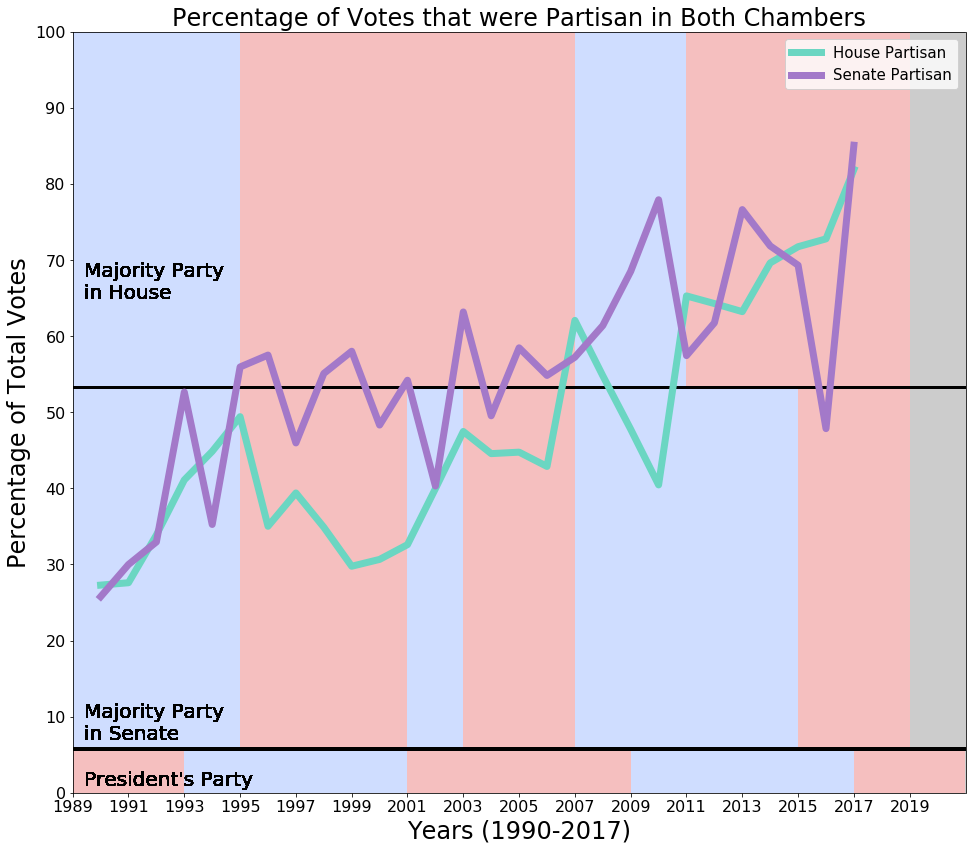

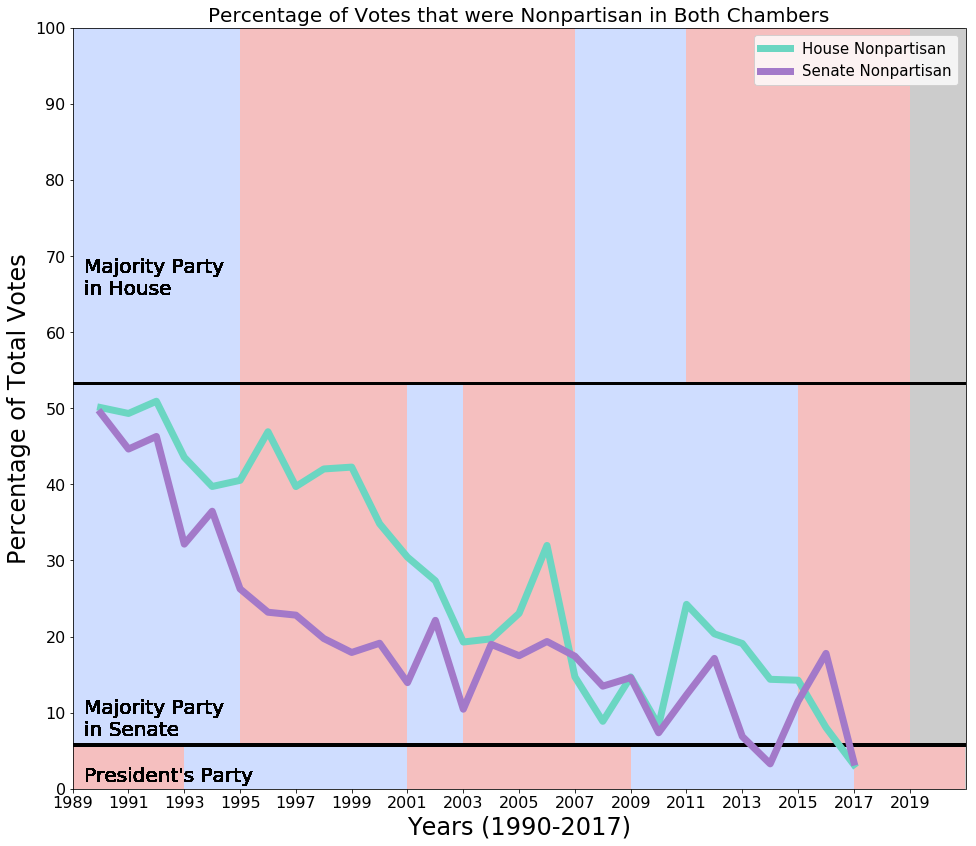

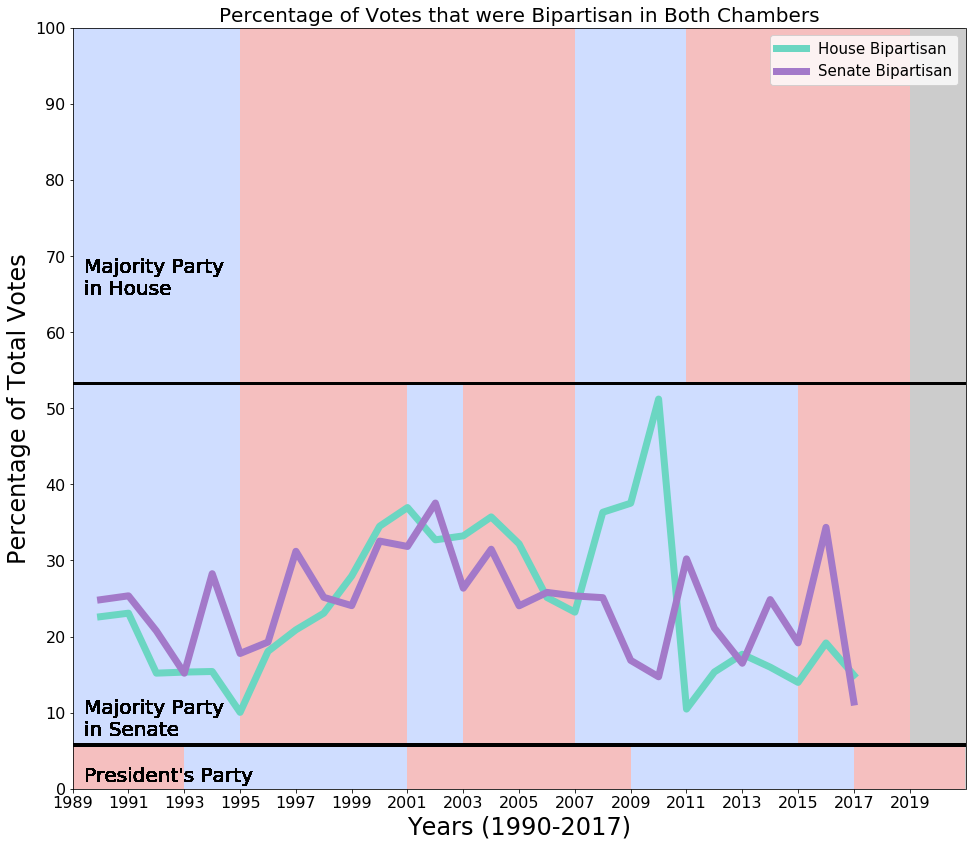

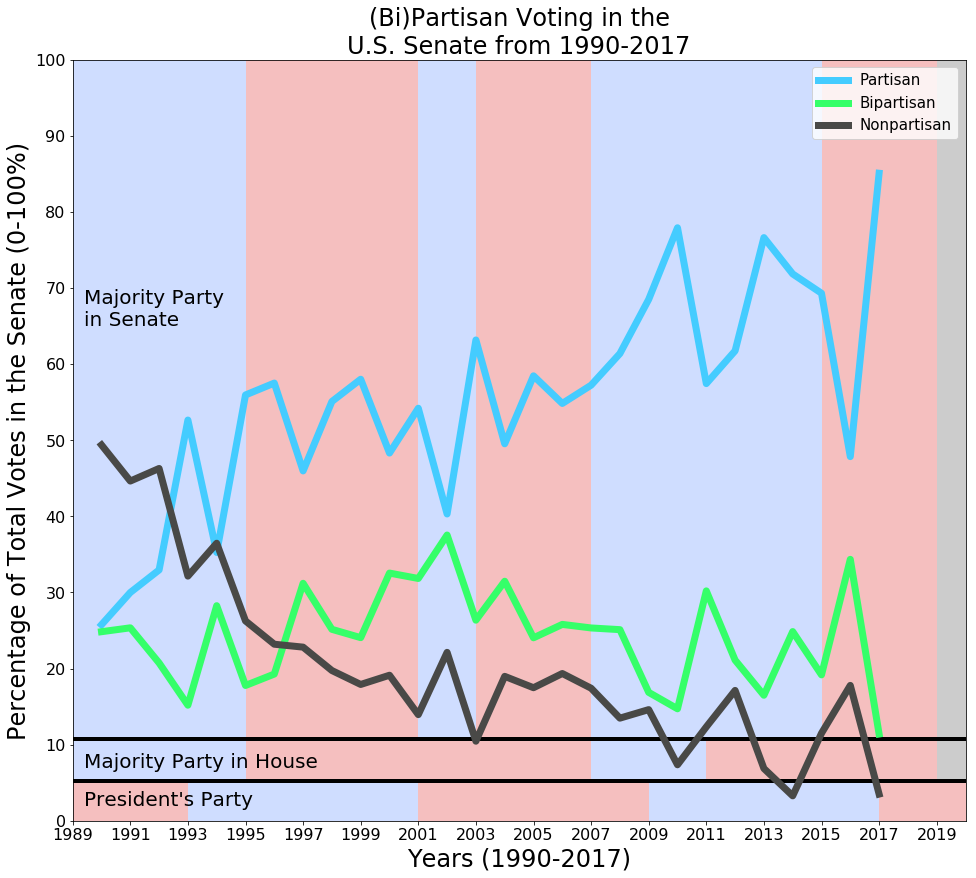

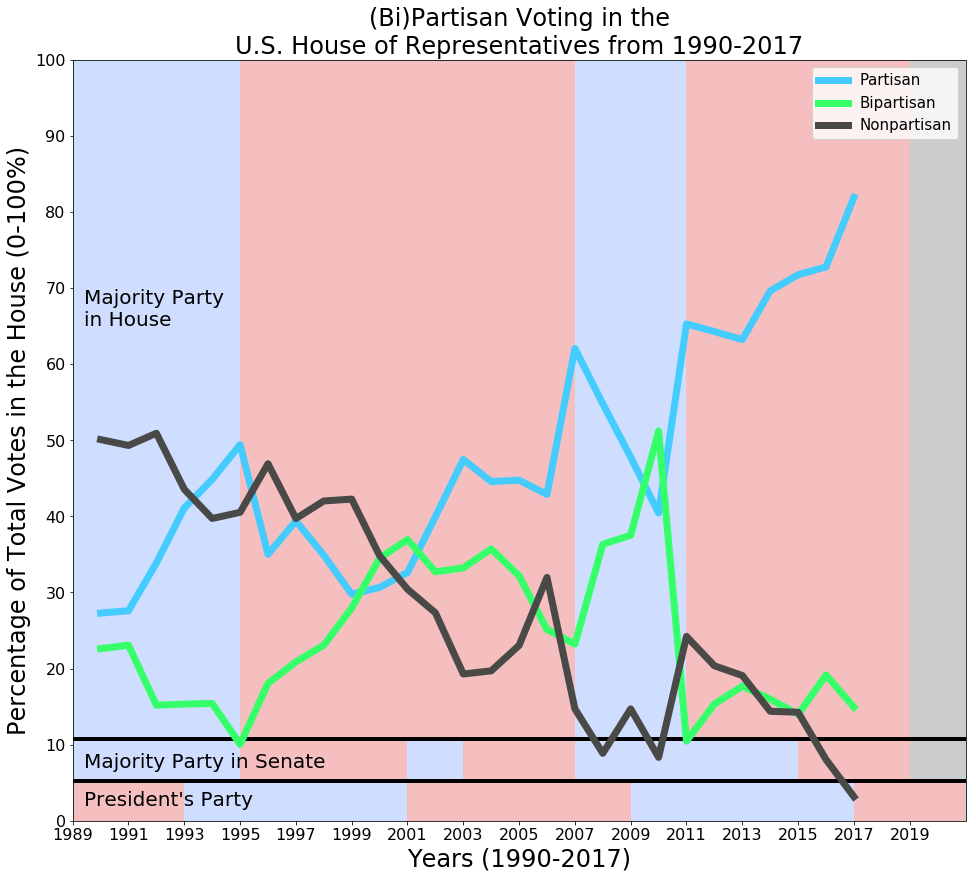

In [7]:
datasci("Partisan")
datasci("Nonpartisan")
datasci("Bipartisan")
senateGenerateLine()
houseGenerateLine()

In [20]:
#correlation between partisan and yes/no
def stdUnits(array):
    return (array - np.mean(array))/np.std(array)

def scatLine(t, cOne, cTwo):
    t.select(cOne, cTwo).scatter(cOne, fit_line=True)
    r = np.mean(stdUnits(t.column(cOne))*stdUnits(t.column(cTwo)))
    return r

congressCorrelation = Table().with_columns("Year", np.arange(1990, 2018),
                                "Partisan", np.array([x['partisan'] for x in cong_dict]),
                                "Nonpartisan", np.array([x['nonpartisan'] for x in cong_dict]),
                                "Bipartisan", np.array([x['bipartisan'] for x in cong_dict]),
                                "Yes", np.array([x['yes'] for x in cong_dict]),
                                "No", np.array([x['no'] for x in cong_dict]))

senateCorrelation = Table().with_columns("Year", np.arange(1990, 2018),
                                "Partisan", np.array([x['partisan'] for x in sen_dict]),
                                "Nonpartisan", np.array([x['nonpartisan'] for x in sen_dict]),
                                "Bipartisan", np.array([x['bipartisan'] for x in sen_dict]),
                                "Yes", np.array([x['yes'] for x in sen_dict]),
                                "No", np.array([x['no'] for x in sen_dict]))


0.8803541768273857

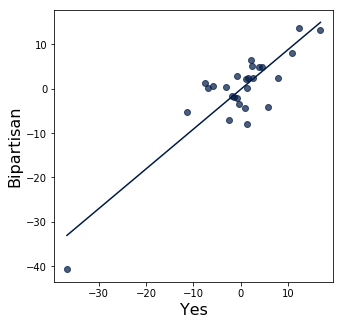

In [21]:
#print(scatLine(congressCorrelation, "Partisan", "Yes"))
colOne = "Bipartisan"
colTwo = "Yes"
tab = congressCorrelation
x1 = (np.diff(tab.column(colOne)))
x2 = (np.diff(tab.column(colTwo)))
scatLine(Table().with_columns(colTwo, x2, colOne, x1), colTwo, colOne)

Based on the correlation coefficient of 0.88, an incredibly high correlation coefficient for a real world dataset, we can say that there is a correlation between the proportion of bipartisan votes and the proportion of votes passed in a given year. 

In [15]:
def compareColumns(TableName, cOne, cTwo, chamber):
    #cOne is Yes or No
    #cTwo is Senate Nonpartisan / House Bipartisan etc. 
    plt.axis([1989, 2022, 0, 100])
    x = np.absolute(TableName.column(cTwo) - TableName.column(cOne))
    plt.plot(TableName.column("Year"), TableName.column(cOne), 'k', c='green', label = cOne, linewidth=5)
    plt.plot(TableName.column("Year"), TableName.column(cTwo), 'k', c='blue', label = cTwo, linewidth=5)
    #plt.plot(TableName.column("Year"), x, 'k', c='red', label = "Difference", linewidth=5)
    drawParties(plt, chamber)
    plt.show()

#compareColumns(senateCorrelation, "No", "Nonpartisan", "senate")
#compareColumns(senateCorrelation, "Yes", "Bipartisan", "house")
#difference/change in time for each specific line and then compute correlation for that

In [53]:
#Hypothesis Testing Calculations
house_2003 = cong_dict[13]
house_2017 = cong_dict[-1]

Hypothesis Test
Here we will describe the methods for the hypothesis test. 
2003 and 2017 were chosen because those were the two years that began a government entirely controlled by the Republican party. 
Alpha value of 0.05
Null Hypothesis: There is no difference between the proportion of partisan votes between 2003 and 2017.  
Alternative Hypothesis: There is a significant difference between the proportion of partisan votes between 2003 and 2017. 
- Ho: p2-p1 = 0
- Ha: p2-p1 != 0
- p' = s1+s2/n1+n2,
    where 's' denotes the successes in a sample and 'n' denotes the sample size. 
- Z = (p2' - p1') - (p2 - p1) / sqrt((p'*(1-p'))*(1/n1 + 1/n2))
- Calculate proportion under the curve on a two-tail valuation of the Z-score
- Compare value to alpha.

In [59]:
def hypo_test(sOne, sTwo, measure):
    Ho = sTwo[measure] - sOne[measure]
    p_hat = sTwo[measure]*sTwo['total'] + sOne[measure]*sOne['total']
    p_hat /= 100*(sTwo['total'] + sOne['total'])
    Z = (sTwo[measure] - sOne[measure] - 0)/100
    Z_den = p_hat*(1-p_hat) * ((1/sOne['total']) + (1/sTwo['total']))
    Z /= pow(Z_den, 0.5)
    print(Z)
hypo_test(house_2003, house_2017, 'partisan')

8.945727355026262


With a Z-score of 8.9457, even on a two-tail test the value is off the charts and the P-value is sginificantly lower than our alpha of 0.05. Because our P-value is less than the alpha value, we reject the null hypothesis in favor of the alternate hypothesis. This provides us with definite proof that Partisanship has changed between the two times that all branches of government were controlled by the house.